# Loading Library

In [1]:
import numpy as np


import pandas as pd


import scipy
#from scipy import stats
from spacy import displacy
import scipy.stats as st
import scipy.io
from scipy.io import loadmat



import sys
import os
import xmltodict, json
from collections import Counter
import urllib.request, sys, re


from matplotlib import pyplot as plt
import matplotlib


from pylab import hist, show, xticks, yticks


import seaborn as sns

import cutecharts.charts as ctc

import plotly.express as px

from tqdm.notebook import tqdm_notebook


import pyLDAvis
import pyLDAvis.gensim

import missingno as msno 


import networkx as nx

import igviz as ig
from igraph.drawing.graph import DefaultGraphDrawer 



from sklearn.preprocessing import LabelEncoder


import en_core_web_sm
import tldextract
from dgaintel import get_prob


from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from gensim import corpora

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob





from urllib.request import urlopen, Request
import urllib.request

#from google.cloud import language_v1
from gensim.models import Phrases
from itertools import chain




/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py:808: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/co

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Theme

In [3]:
color_bf_9 = "#9933ff99"
color_pf_9 = "#1a8cff99"

color_bf_fk_9 = "#cc00cc99"
color_bf_real_9 = "#00999999"

color_pf_fk_9 = "#bf408099"
color_pf_real_9 = "#99990099"

color_fk_9 = "#e6000099"
color_real_9 = "#00990099"

In [4]:
color_bf_4 = "#9933ff44"
color_pf_4 = "#1a8cff44"

color_bf_fk_4 = "#cc00cc44"
color_bf_real_4 = "#00999944"

color_pf_fk_4 = "#bf408044"
color_pf_real_4 = "#99990044"

color_fk_4 = "#e6000044"
color_real_4 = "#00990044"

In [5]:
color_bf = "#9933ff"
color_pf = "#1a8cff"

color_bf_fk = "#cc00cc"
color_bf_real = "#009999"

color_pf_fk = "#bf4080"
color_pf_real = "#999900"

color_fk = "#e60000"
color_real = "#009900"

# Load Files

## Read json files

In [6]:
def get_all_file_from_dir(_dir):
    all_files = []
    for dirname, _, filenames, in os.walk(_dir):
        for filename in filenames:
            all_files.append(os.path.join(dirname, filename))
        return all_files

In [7]:
#dir_buzz_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/BuzzFeed/"
dir_buzz_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/BuzzFeed/"
dir_buzz_fake_cont = dir_buzz_par+"FakeNewsContent/"
dir_buzz_real_cont = dir_buzz_par+"RealNewsContent/"


#dir_politi_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/PolitiFact/"
dir_politi_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/PolitiFact/"
dir_politi_fake_cont = dir_politi_par +"FakeNewsContent/"
dir_politi_real_cont = dir_politi_par+"RealNewsContent/"

In [8]:
files_buzz_fake_cont = get_all_file_from_dir(dir_buzz_fake_cont)
files_buzz_real_cont = get_all_file_from_dir(dir_buzz_real_cont)
files_politi_fake_cont = get_all_file_from_dir(dir_politi_fake_cont)
files_politi_real_cont = get_all_file_from_dir(dir_politi_real_cont)

In [9]:
df_buzz_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_fake_cont)
df_buzz_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_fake_cont]
df_buzz_fake_cont.set_index("news_alph_id", inplace = True)
df_buzz_fake_cont["plt"] = "bf"
df_buzz_fake_cont["news_type"] = "fake"



df_buzz_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_real_cont)
df_buzz_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_real_cont]
df_buzz_real_cont.set_index("news_alph_id", inplace = True)
df_buzz_real_cont["plt"] = "bf"
df_buzz_real_cont["news_type"] = "real"


df_politi_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_fake_cont)
df_politi_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_fake_cont]
df_politi_fake_cont.set_index("news_alph_id", inplace = True)
df_politi_fake_cont["plt"] = "pf"
df_politi_fake_cont["news_type"] = "fake"




df_politi_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_real_cont)
df_politi_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_real_cont]
df_politi_real_cont.set_index("news_alph_id", inplace = True)
df_politi_real_cont["plt"] = "pf"
df_politi_real_cont["news_type"] = "real"

In [10]:
df_bf_news_cont = pd.concat([df_buzz_fake_cont, df_buzz_real_cont])

In [11]:
df_poli_news_cont = pd.concat([df_politi_fake_cont, df_politi_real_cont])

In [12]:
df_all_news_cont = pd.concat([df_bf_news_cont, df_poli_news_cont])

In [13]:
df_all_news_cont = df_all_news_cont.reset_index()

In [14]:
df_all_news_cont[["news_alph_id","news_type"]]

,news_alph_id,news_type
0,BuzzFeed_Fake_28,fake
1,BuzzFeed_Fake_17,fake
2,BuzzFeed_Fake_45,fake
3,BuzzFeed_Fake_41,fake
4,BuzzFeed_Fake_46,fake
...,...,...
417,PolitiFact_Real_39,real
418,PolitiFact_Real_20,real
419,PolitiFact_Real_99,real
420,PolitiFact_Real_30,real


# Load Meta Data

## BF

In [15]:
dir_bf_news = dir_buzz_par + "News.txt"
dir_bf_user = dir_buzz_par + "User.txt"
dir_bf_news_user = dir_buzz_par + "BuzzFeedNewsUser.txt"
dir_bf_user_user = dir_buzz_par + "BuzzFeedUserUser.txt"

In [16]:
with open(dir_bf_news, encoding="utf-8") as file:
    #bf_news = [(_indx+1, l.rstrip("\n")) for _indx, l in enumerate(file)]
    bf_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    
#df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id'])     
df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id', 'news_id_real'])     

In [17]:
df_bf_news["news_num_id"] = "bf_n_" + df_bf_news["news_num_id"].astype(str)

In [18]:
df_bf_news = pd.merge(df_bf_news, df_all_news_cont[["news_alph_id","news_type"]], on = "news_alph_id")

In [19]:
with open(dir_bf_user, encoding="utf-8") as file:
    bf_user = [(_indx, l.rstrip("\n")) for _indx, l in enumerate(file)]

df_bf_user = pd.DataFrame.from_records(bf_user, columns=["user_num_id", "user_alph_id"])    

In [20]:
df_bf_user["user_num_id"] = "bf_u_" + df_bf_user["user_num_id"].astype(str)

In [21]:
df_bf_user

,user_num_id,user_alph_id
0,bf_u_0,98d2b98ce305174e2f6c10b8f8a1a9d5
1,bf_u_1,a273d0fd07c18a884ce2aa425813eb06
2,bf_u_2,ac091e92df9e854a07563ffb397925d4
3,bf_u_3,d2ded2de054f2ceb43dff7f80fc46774
4,bf_u_4,3f2b23abf0e842f6bc97eed85596ff50
...,...,...
15252,bf_u_15252,181082a5374a323a17c208a87c5e0418
15253,bf_u_15253,84170990ec4dfd4a29df1fc6e4ba6b97
15254,bf_u_15254,5d47a2477f7963484463d0020e7d6d21
15255,bf_u_15255,fd2441ac470068419ce32248b2f478f0


In [22]:
df_bf_news_user = pd.read_csv(dir_bf_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [23]:
df_bf_news_user["news_num_id"] = "bf_n_" + df_bf_news_user["news_num_id"].astype(str)
df_bf_news_user["user_num_id"] = "bf_u_" + df_bf_news_user["user_num_id"].astype(str)

df_bf_news_user

,news_num_id,user_num_id,times
0,bf_n_45,bf_u_1,1
1,bf_n_127,bf_u_2,1
2,bf_n_115,bf_u_3,1
3,bf_n_180,bf_u_3,1
4,bf_n_140,bf_u_4,1
...,...,...,...
22774,bf_n_150,bf_u_15257,1
22775,bf_n_151,bf_u_15257,1
22776,bf_n_152,bf_u_15257,1
22777,bf_n_155,bf_u_15257,1


In [24]:
df_bf_user_user = pd.read_csv(dir_bf_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [25]:
df_bf_user_user["follower_num_id"] = "bf_u_" + df_bf_user_user["follower_num_id"].astype(str)
df_bf_user_user["user_num_id"] = "bf_u_" + df_bf_user_user["user_num_id"].astype(str)

## Politifact

In [26]:
dir_poli_news = dir_politi_par + "News.txt"
dir_poli_user = dir_politi_par + "User.txt"
dir_poli_news_user = dir_politi_par + "PolitiFactNewsUser.txt"
dir_poli_user_user = dir_politi_par + "PolitiFactUserUser.txt"

In [27]:
with open(dir_poli_news, encoding="utf-8") as file:
    poli_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    df_poli_news = pd.DataFrame.from_records(poli_news, columns=["news_num_id", "news_alph_id", "news_id_real"])    

In [28]:
df_poli_news["news_num_id"] = "pf_n_" + df_poli_news["news_num_id"].astype(str)
df_poli_news

,news_num_id,news_alph_id,news_id_real
0,pf_n_1,PolitiFact_Real_1,PolitiFact_Real_1
1,pf_n_2,PolitiFact_Real_2,PolitiFact_Real_2
2,pf_n_3,PolitiFact_Real_3,PolitiFact_Real_3
3,pf_n_4,PolitiFact_Real_4,PolitiFact_Real_4
4,pf_n_5,PolitiFact_Real_5,PolitiFact_Real_5
...,...,...,...
235,pf_n_236,PolitiFact_Fake_116,PolitiFact_Fake_236
236,pf_n_237,PolitiFact_Fake_117,PolitiFact_Fake_237
237,pf_n_238,PolitiFact_Fake_118,PolitiFact_Fake_238
238,pf_n_239,PolitiFact_Fake_119,PolitiFact_Fake_239


In [29]:
df_pf_news = pd.merge(df_poli_news, df_all_news_cont[["news_alph_id","news_type"]], on = "news_alph_id")

In [30]:
with open(dir_poli_user, encoding="utf-8") as file:
    poli_user = [(_indx+1, l.rstrip("\n")) for _indx, l in enumerate(file)]
df_poli_user = pd.DataFrame.from_records(poli_user, columns=["user_num_id", "user_alph_id"])    


In [31]:
df_poli_user["user_num_id"] = "pf_u_" + df_poli_user["user_num_id"].astype(str)

In [32]:
df_poli_news_user = pd.read_csv(dir_poli_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [33]:
df_poli_news_user["news_num_id"] = "pf_n_" + df_poli_news_user["news_num_id"].astype(str)
df_poli_news_user["user_num_id"] = "pf_u_" + df_poli_news_user["user_num_id"].astype(str)

df_poli_news_user

,news_num_id,user_num_id,times
0,pf_n_240,pf_u_1,1
1,pf_n_124,pf_u_2,1
2,pf_n_162,pf_u_3,1
3,pf_n_233,pf_u_4,1
4,pf_n_50,pf_u_5,1
...,...,...,...
32786,pf_n_227,pf_u_23861,1
32787,pf_n_155,pf_u_23862,1
32788,pf_n_227,pf_u_23863,2
32789,pf_n_147,pf_u_23864,1


In [34]:
df_poli_user_user = pd.read_csv(dir_poli_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [35]:
df_poli_user_user["follower_num_id"] = "pf_u_" + df_poli_user_user["follower_num_id"].astype(str)
df_poli_user_user["user_num_id"] = "pf_u_" + df_poli_user_user["user_num_id"].astype(str)

df_poli_user_user

,follower_num_id,user_num_id
0,pf_u_507,pf_u_1
1,pf_u_1589,pf_u_1
2,pf_u_5307,pf_u_1
3,pf_u_11421,pf_u_1
4,pf_u_13267,pf_u_1
...,...,...
574739,pf_u_22113,pf_u_23864
574740,pf_u_6324,pf_u_23865
574741,pf_u_10715,pf_u_23865
574742,pf_u_11222,pf_u_23865


My dataframes

In [36]:
df_bf_news ## all type of news id, news type

,news_num_id,news_alph_id,news_id_real,news_type
0,bf_n_1,BuzzFeed_Real_1,BuzzFeed_Real_1,real
1,bf_n_2,BuzzFeed_Real_2,BuzzFeed_Real_2,real
2,bf_n_3,BuzzFeed_Real_3,BuzzFeed_Real_3,real
3,bf_n_4,BuzzFeed_Real_4,BuzzFeed_Real_4,real
4,bf_n_5,BuzzFeed_Real_5,BuzzFeed_Real_5,real
...,...,...,...,...
177,bf_n_178,BuzzFeed_Fake_87,BuzzFeed_Fake_178,fake
178,bf_n_179,BuzzFeed_Fake_88,BuzzFeed_Fake_179,fake
179,bf_n_180,BuzzFeed_Fake_89,BuzzFeed_Fake_180,fake
180,bf_n_181,BuzzFeed_Fake_90,BuzzFeed_Fake_181,fake


In [37]:
df_pf_news

,news_num_id,news_alph_id,news_id_real,news_type
0,pf_n_1,PolitiFact_Real_1,PolitiFact_Real_1,real
1,pf_n_2,PolitiFact_Real_2,PolitiFact_Real_2,real
2,pf_n_3,PolitiFact_Real_3,PolitiFact_Real_3,real
3,pf_n_4,PolitiFact_Real_4,PolitiFact_Real_4,real
4,pf_n_5,PolitiFact_Real_5,PolitiFact_Real_5,real
...,...,...,...,...
235,pf_n_236,PolitiFact_Fake_116,PolitiFact_Fake_236,fake
236,pf_n_237,PolitiFact_Fake_117,PolitiFact_Fake_237,fake
237,pf_n_238,PolitiFact_Fake_118,PolitiFact_Fake_238,fake
238,pf_n_239,PolitiFact_Fake_119,PolitiFact_Fake_239,fake


In [38]:
df_all_news_id_lbl = pd.concat([df_bf_news, df_pf_news])

In [39]:
df_all_news_id_lbl.reset_index(drop=True, inplace=True)

In [40]:
df_all_news_id_lbl

,news_num_id,news_alph_id,news_id_real,news_type
0,bf_n_1,BuzzFeed_Real_1,BuzzFeed_Real_1,real
1,bf_n_2,BuzzFeed_Real_2,BuzzFeed_Real_2,real
2,bf_n_3,BuzzFeed_Real_3,BuzzFeed_Real_3,real
3,bf_n_4,BuzzFeed_Real_4,BuzzFeed_Real_4,real
4,bf_n_5,BuzzFeed_Real_5,BuzzFeed_Real_5,real
...,...,...,...,...
417,pf_n_236,PolitiFact_Fake_116,PolitiFact_Fake_236,fake
418,pf_n_237,PolitiFact_Fake_117,PolitiFact_Fake_237,fake
419,pf_n_238,PolitiFact_Fake_118,PolitiFact_Fake_238,fake
420,pf_n_239,PolitiFact_Fake_119,PolitiFact_Fake_239,fake


In [41]:
df_bf_news_user = pd.merge(df_bf_news_user, df_all_news_id_lbl, on = "news_num_id")

In [42]:
df_bf_news_user

,news_num_id,user_num_id,times,news_alph_id,news_id_real,news_type
0,bf_n_45,bf_u_1,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
1,bf_n_45,bf_u_6,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
2,bf_n_45,bf_u_7,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
3,bf_n_45,bf_u_8,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
4,bf_n_45,bf_u_18,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
...,...,...,...,...,...,...
22774,bf_n_134,bf_u_14844,1,BuzzFeed_Fake_43,BuzzFeed_Fake_134,fake
22775,bf_n_63,bf_u_11398,1,BuzzFeed_Real_63,BuzzFeed_Real_63,real
22776,bf_n_47,bf_u_11887,1,BuzzFeed_Real_47,BuzzFeed_Real_47,real
22777,bf_n_47,bf_u_12499,1,BuzzFeed_Real_47,BuzzFeed_Real_47,real


In [43]:
df_pf_news_user = pd.merge(df_poli_news_user, df_all_news_id_lbl, on = "news_num_id")

In [44]:
df_pf_news_user

,news_num_id,user_num_id,times,news_alph_id,news_id_real,news_type
0,pf_n_240,pf_u_1,1,PolitiFact_Fake_120,PolitiFact_Fake_240,fake
1,pf_n_240,pf_u_507,1,PolitiFact_Fake_120,PolitiFact_Fake_240,fake
2,pf_n_240,pf_u_835,2,PolitiFact_Fake_120,PolitiFact_Fake_240,fake
3,pf_n_240,pf_u_972,1,PolitiFact_Fake_120,PolitiFact_Fake_240,fake
4,pf_n_240,pf_u_992,1,PolitiFact_Fake_120,PolitiFact_Fake_240,fake
...,...,...,...,...,...,...
32786,pf_n_22,pf_u_14243,1,PolitiFact_Real_22,PolitiFact_Real_22,real
32787,pf_n_104,pf_u_15243,1,PolitiFact_Real_104,PolitiFact_Real_104,real
32788,pf_n_173,pf_u_17714,1,PolitiFact_Fake_53,PolitiFact_Fake_173,fake
32789,pf_n_198,pf_u_19687,1,PolitiFact_Fake_78,PolitiFact_Fake_198,fake


In [45]:
df_all_news_user = pd.concat([df_bf_news_user, df_pf_news_user])

In [46]:
df_all_news_user.reset_index(drop=True, inplace=True)

In [47]:
df_all_news_user

,news_num_id,user_num_id,times,news_alph_id,news_id_real,news_type
0,bf_n_45,bf_u_1,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
1,bf_n_45,bf_u_6,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
2,bf_n_45,bf_u_7,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
3,bf_n_45,bf_u_8,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
4,bf_n_45,bf_u_18,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
...,...,...,...,...,...,...
55565,pf_n_22,pf_u_14243,1,PolitiFact_Real_22,PolitiFact_Real_22,real
55566,pf_n_104,pf_u_15243,1,PolitiFact_Real_104,PolitiFact_Real_104,real
55567,pf_n_173,pf_u_17714,1,PolitiFact_Fake_53,PolitiFact_Fake_173,fake
55568,pf_n_198,pf_u_19687,1,PolitiFact_Fake_78,PolitiFact_Fake_198,fake


In [48]:
df_all_user_user = pd.concat([df_bf_user_user,df_poli_user_user])

In [49]:
df_all_user_user.reset_index(drop=True, inplace=True)

In [50]:
df_all_user_user

,follower_num_id,user_num_id
0,bf_u_48,bf_u_1
1,bf_u_899,bf_u_1
2,bf_u_6781,bf_u_1
3,bf_u_10097,bf_u_1
4,bf_u_100,bf_u_2
...,...,...
1209489,pf_u_22113,pf_u_23864
1209490,pf_u_6324,pf_u_23865
1209491,pf_u_10715,pf_u_23865
1209492,pf_u_11222,pf_u_23865


# Networkx analysis

## News User

In [51]:
df_all_news_user

,news_num_id,user_num_id,times,news_alph_id,news_id_real,news_type
0,bf_n_45,bf_u_1,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
1,bf_n_45,bf_u_6,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
2,bf_n_45,bf_u_7,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
3,bf_n_45,bf_u_8,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
4,bf_n_45,bf_u_18,1,BuzzFeed_Real_45,BuzzFeed_Real_45,real
...,...,...,...,...,...,...
55565,pf_n_22,pf_u_14243,1,PolitiFact_Real_22,PolitiFact_Real_22,real
55566,pf_n_104,pf_u_15243,1,PolitiFact_Real_104,PolitiFact_Real_104,real
55567,pf_n_173,pf_u_17714,1,PolitiFact_Fake_53,PolitiFact_Fake_173,fake
55568,pf_n_198,pf_u_19687,1,PolitiFact_Fake_78,PolitiFact_Fake_198,fake


In [54]:
G_news_user = nx.DiGraph()
G_real_news_user = nx.DiGraph()
G_fake_news_user = nx.DiGraph()

In [55]:
for index, row in df_all_news_user[df_all_news_user["news_type"] == "real"].iterrows():
    G_real_news_user.add_edge(row["news_id_real"], row["user_num_id"], weight = float(row["times"]), news_type = row["news_type"])


In [56]:
for index, row in df_all_news_user[df_all_news_user["news_type"] == "fake"].iterrows():
    G_fake_news_user.add_edge(row["news_id_real"], row["user_num_id"], weight = float(row["times"]), news_type = row["news_type"])


In [57]:
for index, row in df_all_news_user.iterrows():
    G_news_user.add_edge(row["news_id_real"], row["user_num_id"], weight = float(row["times"]), news_type = row["news_type"])


In [58]:
nx.write_gexf(G_news_user, "all_news_user.gexf")

In [59]:
nx.write_gexf(G_real_news_user, "real_news_user.gexf")
nx.write_gexf(G_fake_news_user, "fake_news_user.gexf")

### Centrality measure

In [88]:
df_centrality = pd.DataFrame(columns = ["values", "News Type", "matrix"])

### Degree centrality

In [89]:
graph = G_real_news_user.copy()
degree_centrality_real = nx.degree_centrality(graph)
degree_centrality_real = sorted(degree_centrality_real.items(), key=lambda kv: kv[1], reverse= True)
df_degree_centrality_real = pd.DataFrame(degree_centrality_real, columns= ["Node", "Degree Centrality"])

In [90]:
df_degree_centrality_real

,Node,Degree Centrality
0,BuzzFeed_Real_45,0.091626
1,BuzzFeed_Real_32,0.086803
2,PolitiFact_Real_37,0.066825
3,BuzzFeed_Real_87,0.057716
4,BuzzFeed_Real_72,0.051516
...,...,...
13060,pf_u_20260,0.000077
13061,PolitiFact_Real_22,0.000077
13062,pf_u_14243,0.000077
13063,PolitiFact_Real_104,0.000077


In [91]:
graph = G_fake_news_user.copy()
degree_centrality_fake = nx.degree_centrality(graph)
degree_centrality_fake = sorted(degree_centrality_fake.items(), key=lambda kv: kv[1], reverse= True)
df_degree_centrality_fake = pd.DataFrame(degree_centrality_fake, columns= ["Node", "Degree Centrality"])

In [92]:
df_centrality = df_centrality.append(pd.DataFrame({"values" : df_degree_centrality_real[df_degree_centrality_real['Node'].str.contains("Real")]["Degree Centrality"].values,
             "News Type" : "real", "matrix" : "Degree Centrality"}))

In [93]:
df_centrality = df_centrality.append(pd.DataFrame({"values" : df_degree_centrality_fake[df_degree_centrality_fake['Node'].str.contains("Fake")]["Degree Centrality"].values,
                                                   "News Type" : "fake", "matrix" : "Degree Centrality"}))

In [94]:
df_centrality

,values,News Type,matrix
0,0.091626,real,Degree Centrality
1,0.086803,real,Degree Centrality
2,0.066825,real,Degree Centrality
3,0.057716,real,Degree Centrality
4,0.051516,real,Degree Centrality
...,...,...,...
206,0.000036,fake,Degree Centrality
207,0.000036,fake,Degree Centrality
208,0.000036,fake,Degree Centrality
209,0.000036,fake,Degree Centrality


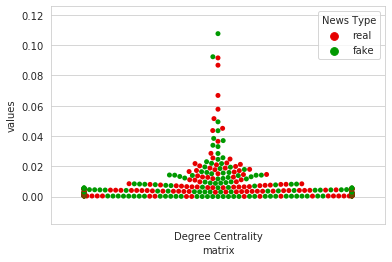

In [95]:
with sns.axes_style("whitegrid"):  
    sns.swarmplot(data=df_centrality, 
                  x = "matrix", y="values", hue = "News Type", palette = sns.color_palette([color_fk_4, color_real_4]))

### Eigen vector centrality

In [96]:
graph = G_real_news_user.copy()
degree_centrality_real = nx.nx.eigenvector_centrality(graph)
degree_centrality_real = sorted(degree_centrality_real.items(), key=lambda kv: kv[1], reverse= True)
df_degree_centrality_real = pd.DataFrame(degree_centrality_real, columns= ["Node", "Degree Centrality"])

In [97]:
df_degree_centrality_real

,Node,Degree Centrality
0,bf_u_14404,0.181643
1,pf_u_11690,0.151381
2,bf_u_5392,0.121119
3,pf_u_10374,0.113554
4,bf_u_4463,0.105989
...,...,...
13060,PolitiFact_Real_54,0.000073
13061,PolitiFact_Real_47,0.000073
13062,PolitiFact_Real_117,0.000073
13063,PolitiFact_Real_22,0.000073


In [98]:
graph = G_fake_news_user.copy()
degree_centrality_fake = nx.eigenvector_centrality(graph)
degree_centrality_fake = sorted(degree_centrality_fake.items(), key=lambda kv: kv[1], reverse= True)
df_degree_centrality_fake = pd.DataFrame(degree_centrality_fake, columns= ["Node", "Degree Centrality"])

In [99]:
df_centrality = df_centrality.append(pd.DataFrame({"values" : df_degree_centrality_real[df_degree_centrality_real['Node'].str.contains("Real")]["Degree Centrality"].values,
             "News Type" : "real", "matrix" : "Eigen Vec Cent."}))

In [100]:
df_centrality = df_centrality.append(pd.DataFrame({"values" : df_degree_centrality_fake[df_degree_centrality_fake['Node'].str.contains("Fake")]["Degree Centrality"].values,
                                                   "News Type" : "fake", "matrix" : "Eigen Vec Cent."}))

In [115]:
df_centrality[df_centrality["matrix"] == "Eigen Vec Cent."]

,values,News Type,matrix
0,0.000073,real,Eigen Vec Cent.
1,0.000073,real,Eigen Vec Cent.
2,0.000073,real,Eigen Vec Cent.
3,0.000073,real,Eigen Vec Cent.
4,0.000073,real,Eigen Vec Cent.
...,...,...,...
206,0.000076,fake,Eigen Vec Cent.
207,0.000076,fake,Eigen Vec Cent.
208,0.000076,fake,Eigen Vec Cent.
209,0.000076,fake,Eigen Vec Cent.


In [113]:
df_centrality[df_centrality["matrix"] == "Eigen Vec Cent."]["values"] *= 100000

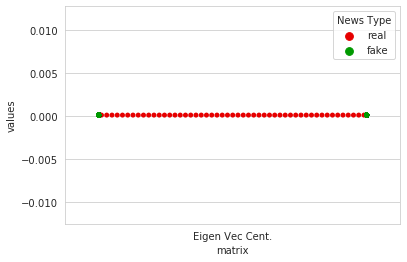

In [114]:
with sns.axes_style("whitegrid"):  
    sns.swarmplot(data=df_centrality[df_centrality["matrix"] == "Eigen Vec Cent."], 
                  x = "matrix", y="values", hue = "News Type", palette = sns.color_palette([color_fk_4, color_real_4]))

In [ ]:
"""
pos = nx.spring_layout(G_news_user)

# larger figure size
plt.figure(3,figsize=(50,50)) 
nx.draw(G_news_user,pos)
plt.show()
"""

In [116]:
df_all_news_user["times"]

0        1
1        1
2        1
3        1
4        1
        ..
55565    1
55566    1
55567    1
55568    1
55569    1
Name: times, Length: 55570, dtype: int64

In [138]:
df_all_news_user[df_all_news_user["news_type"] == "real"]["times"].values

array([1, 1, 1, ..., 1, 1, 1])

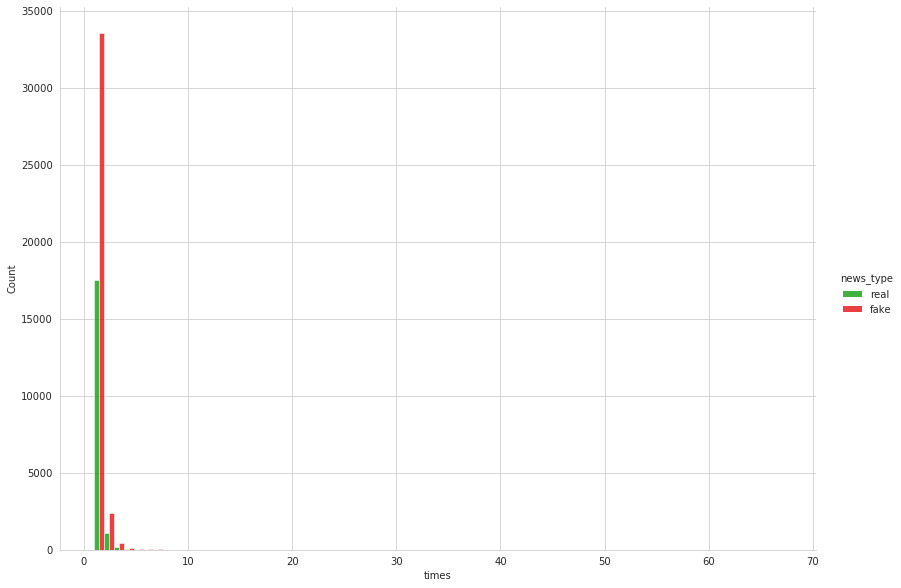

In [134]:
with sns.axes_style("whitegrid"):   
    sns.displot(df_all_news_user, x="times", hue="news_type", bins = 70, fill=True, height=8.27, aspect=11.7/8.27,  multiple="dodge", palette = sns.color_palette([color_real_4, color_fk_4]))

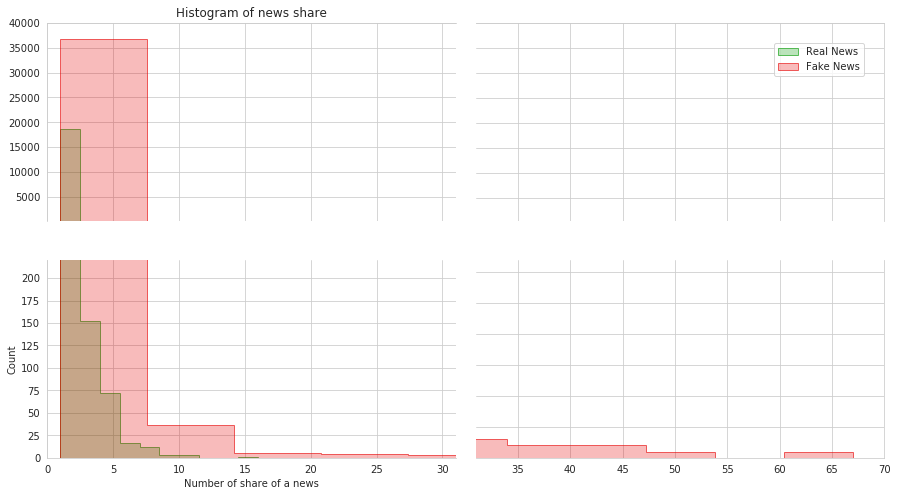

In [175]:
with sns.axes_style("whitegrid"):    
    fig, axs = plt.subplots(2, 2, sharex=False, sharey = False, figsize=(15,8))

    _p1 = axs[0,0].hist(df_all_news_user[df_all_news_user["news_type"] == "real"]["times"].values, color = color_real_4, edgecolor = color_real_9, bins = 10, histtype='stepfilled',)
    
    _p1 = axs[0,0].hist(df_all_news_user[df_all_news_user["news_type"] == "fake"]["times"].values, color = color_fk_4, edgecolor = color_fk_9, bins = 10,histtype='stepfilled',)
    

    
    _p1 = axs[0,1].hist(df_all_news_user[df_all_news_user["news_type"] == "real"]["times"].values, color = color_real_4, edgecolor = color_real_9, bins = 10, histtype='stepfilled',)
    
    _p1 = axs[0,1].hist(df_all_news_user[df_all_news_user["news_type"] == "fake"]["times"].values, color = color_fk_4, edgecolor = color_fk_9, bins = 10,histtype='stepfilled',)
 

    _p1 = axs[1,0].hist(df_all_news_user[df_all_news_user["news_type"] == "real"]["times"].values, color = color_real_4, edgecolor = color_real_9, bins = 10, histtype='stepfilled',)
    
    _p1 = axs[1,0].hist(df_all_news_user[df_all_news_user["news_type"] == "fake"]["times"].values, color = color_fk_4, edgecolor = color_fk_9, bins = 10,histtype='stepfilled',)
 

    _p1 = axs[1,1].hist(df_all_news_user[df_all_news_user["news_type"] == "real"]["times"].values, color = color_real_4, edgecolor = color_real_9, bins = 10, histtype='stepfilled',)
    
    _p1 = axs[1,1].hist(df_all_news_user[df_all_news_user["news_type"] == "fake"]["times"].values, color = color_fk_4, edgecolor = color_fk_9, bins = 10,histtype='stepfilled',)
 
    
    
    mn, mx = plt.xlim()
    
    
    
    axs[0,0].set_xlim(0, 31) # outliers only
    axs[0,0].set_ylim(220, 40000) # outliers only    
  
    axs[1,0].set_xlim(0,31) # most of the data
    axs[1,0].set_ylim(0,220) # most of the data

    axs[0,1].set_xlim(31, 70) # outliers only
    axs[0,1].set_ylim(510, 40000) # outliers only

    axs[1,1].set_xlim(31, 70) # most of the data
    axs[1,1].set_ylim(0,32) # most of the data    
    
    
    # hide the spines between ax and ax2
    axs[0,0].spines['bottom'].set_visible(False)
    axs[0,0].spines['right'].set_visible(False)    
        
    axs[1,0].spines['top'].set_visible(False)
    axs[1,0].spines['right'].set_visible(False)    
    

    # hide the spines between ax and ax2
    axs[0,1].spines['bottom'].set_visible(False)
    axs[0,1].spines['left'].set_visible(False)         


    axs[1,1].spines['top'].set_visible(False)
    axs[1,1].spines['left'].set_visible(False)    
    
 
   
    axs[0,0].tick_params(labelbottom=False)
    
    axs[0,1].tick_params(labelbottom=False)
    axs[0,1].tick_params(labelleft=False)
    
    axs[1,1].tick_params(labelleft=False)
    
    axs[1,0].set_xlabel("Number of share of a news")
    axs[1,0].set_ylabel("Count")
    axs[0,0].set_title("Histogram of news share")    
    
    plt.subplots_adjust(wspace=0.05)    
    
    axs[0,1].legend(labels = ["Real News", "Fake News"], loc='right top',
       ncol=1,  borderaxespad=2.0, prop={'size': 10})
    
    #xticks(-0.0+np.arange(20), top_fake_authors[:20], rotation=90)
